# Work session: Emulate the major findings in "Gasoline consumption and cities: a comparison of US cities with a global survey"

**GOAL**: Conduct data analysis to the impacts of **internal factors** (socioeconomic backgrounds) vs. **external factors** (built environment) on sustainable travel behaviors. Here we use driving ratio to approximate the gasoline consumption.

**Question: What are the inputs and outputs based on this statement?**





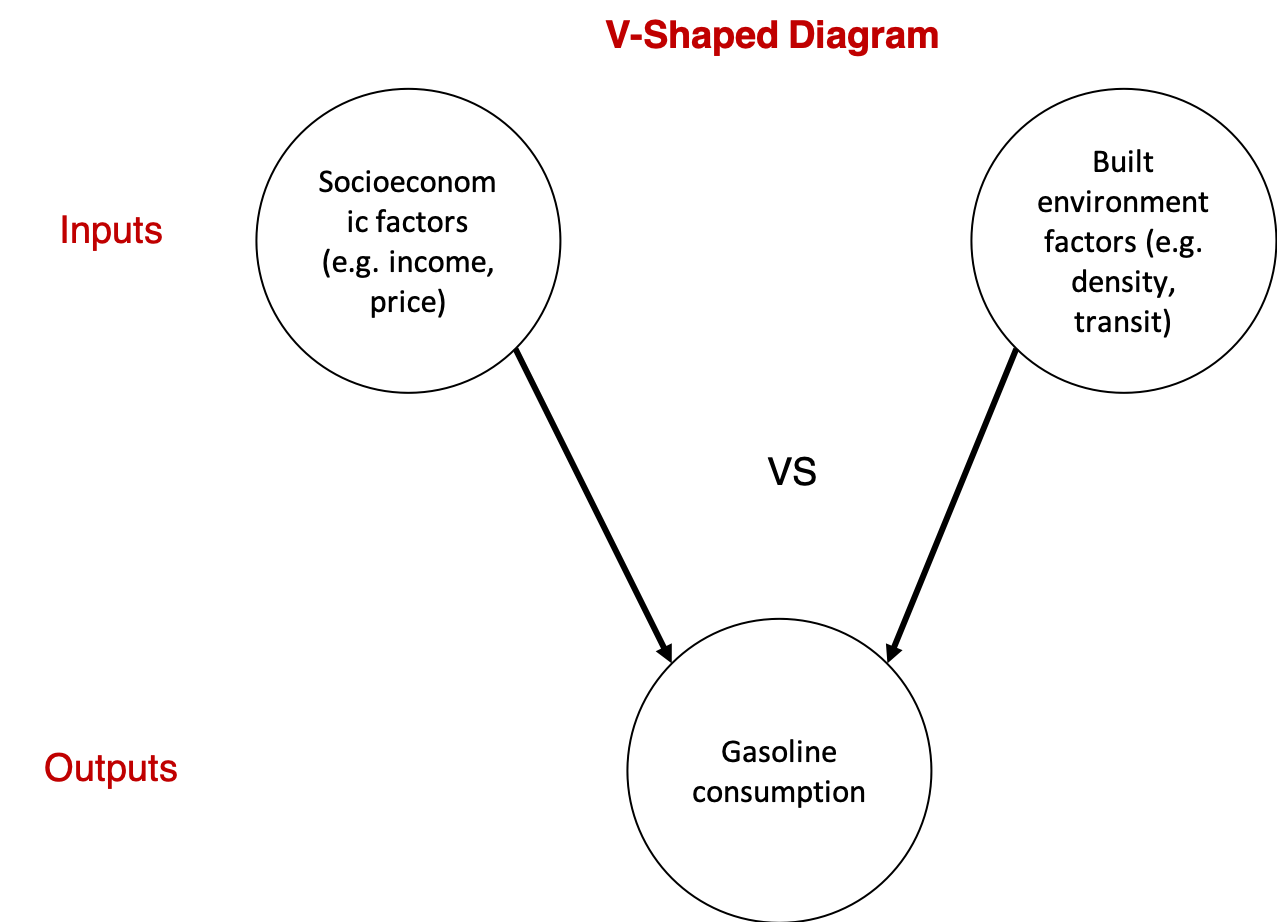

# Analytical process

- Section 0. Load and process data
- Section 1. Develop and describe metrics - population and job densities. (hardest...)
- Section 2. Compute correlation coefficients
- Section 3. Develop a table resembling Table 1 in the example article.
- Section 4. Plot a figure resembling Figure 1 in the example article.
- Section 5. Summary. Do your findings in Florida support the results from the example article? Why or why not?


## This notebook has no solution, but I will upload one with solution after the lecture.

## Section 0. Load and Process data

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import statsmodels.api as sm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# read the data and shapefile
df = pd.read_csv('SampleDataset/Florida_ct.csv', index_col = 0)
florida_shapefile = gpd.read_file('SampleDataset/tl_2020_12_tract/tl_2020_12_tract.shp') # read the shapefile

In [3]:
# view the dataframe
df.head()

,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,...,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
0,2812.0,2812.0,1383.0,1429.0,39.4,931.0,2812.0,2086.0,517.0,0.0,...,0.014815,0.024242,0.183838,0.029798,0.003030,0.216667,0.286635,0.528094,1.595059,0.155938
1,4709.0,4709.0,2272.0,2437.0,34.2,1668.0,4709.0,2382.0,1953.0,0.0,...,0.022150,0.004615,0.135222,0.040245,0.003220,0.178686,0.318327,0.460183,1.299161,0.152869
2,5005.0,5005.0,2444.0,2561.0,34.1,1379.0,5005.0,2334.0,2206.0,224.0,...,0.026141,0.027913,0.213247,0.064620,0.007431,0.285299,0.366755,0.450949,1.636693,0.162211
3,6754.0,6754.0,2934.0,3820.0,31.3,2238.0,6754.0,4052.0,1671.0,326.0,...,0.052697,0.004054,0.093379,0.082510,0.012599,0.188488,0.314452,0.474830,1.432976,0.178716
4,3021.0,3021.0,1695.0,1326.0,44.1,1364.0,3021.0,2861.0,121.0,0.0,...,0.003014,0.013059,0.219868,0.138631,0.007064,0.365563,0.218447,0.659053,1.459677,0.335930


In [4]:
florida_shapefile

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,12,011,110403,12011110403,1104.03,Census Tract 1104.03,G5020,S,1323099,0,+25.9882712,-080.2428385,"POLYGON ((-80.24758 25.99480, -80.24754 25.994..."
1,12,011,060114,12011060114,601.14,Census Tract 601.14,G5020,S,2598912,0,+26.1864137,-080.2598783,"POLYGON ((-80.26810 26.19368, -80.26702 26.193..."
2,12,011,060120,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,+26.1433192,-080.3341825,"POLYGON ((-80.36670 26.12828, -80.36649 26.128..."
3,12,011,110347,12011110347,1103.47,Census Tract 1103.47,G5020,S,2846117,545293,+26.0230637,-080.4006685,"POLYGON ((-80.40957 26.03541, -80.40878 26.035..."
4,12,011,020421,12011020421,204.21,Census Tract 204.21,G5020,S,1060862,16632,+26.2129463,-080.2358809,"POLYGON ((-80.24061 26.22083, -80.24056 26.220..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,12,015,020700,12015020700,207,Census Tract 207,G5020,S,2619776,106556,+26.9907679,-082.1015467,"POLYGON ((-82.11510 26.99392, -82.11501 26.994..."
5156,12,005,001900,12005001900,19,Census Tract 19,G5020,S,3493618,2801264,+30.1449083,-085.6484407,"POLYGON ((-85.66319 30.14896, -85.65959 30.151..."
5157,12,005,000600,12005000600,6,Census Tract 6,G5020,S,54190724,9090097,+29.9839939,-085.4173812,"POLYGON ((-85.44868 30.02877, -85.44723 30.030..."
5158,12,005,000500,12005000500,5,Census Tract 5,G5020,S,337874718,28527612,+30.1593438,-085.4816570,"POLYGON ((-85.60781 30.17663, -85.60781 30.179..."


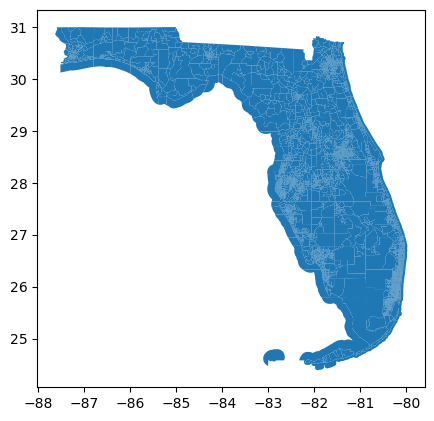

In [5]:
# quick view of the shapefile.
florida_shapefile.plot(figsize = (5,5))
plt.show()

In [6]:
# adjust the object types to facilitate the merge
florida_shapefile['GEOID'] = florida_shapefile.GEOID.astype('int64')

In [7]:
# combine the dataframe with the shapefile.
# Note that it is important to choose how - e.g., inner, right, left, etc. Here I choose 'left' for teaching purposes.
df_shp = florida_shapefile.merge(df,
                                 how = 'left',
                                 left_on = 'GEOID',
                                 right_on = 'full_ct_fips')

In [8]:
df_shp

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
0,12,011,110403,12011110403,1104.03,Census Tract 1104.03,G5020,S,1323099,0,...,0.000000,0.017004,0.091483,0.060147,0.013899,0.165529,0.278519,0.553838,1.937228,0.030723
1,12,011,060114,12011060114,601.14,Census Tract 601.14,G5020,S,2598912,0,...,0.010400,0.050442,0.253958,0.054749,0.023307,0.332014,0.233480,0.607103,1.957252,0.108844
2,12,011,060120,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,...,0.015806,0.093356,0.323871,0.118865,0.013207,0.455943,0.258939,0.554582,1.674524,0.215953
3,12,011,110347,12011110347,1103.47,Census Tract 1103.47,G5020,S,2846117,545293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,011,020421,12011020421,204.21,Census Tract 204.21,G5020,S,1060862,16632,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,12,015,020700,12015020700,207,Census Tract 207,G5020,S,2619776,106556,...,0.016979,0.063450,0.048280,0.014137,0.006402,0.068818,0.702392,0.240077,0.486310,0.170811
5156,12,005,001900,12005001900,19,Census Tract 19,G5020,S,3493618,2801264,...,0.000000,0.042712,0.272564,0.104603,0.002690,0.379857,0.352463,0.498792,1.173037,0.060650
5157,12,005,000600,12005000600,6,Census Tract 6,G5020,S,54190724,9090097,...,0.039185,0.095611,0.194805,0.131494,0.018669,0.344968,0.489378,0.460317,0.938235,0.643045
5158,12,005,000500,12005000500,5,Census Tract 5,G5020,S,337874718,28527612,...,0.000000,0.024557,0.108001,0.060415,0.013996,0.182412,0.331173,0.485219,1.382467,0.201167


## Section 1. Developing metrics (the hardest among all the sections...)
- How to develop the density metrics? Hint: ALAND (squared meters), AWATER (squared meters), employment_employed, and pop_total.
- Describe the metrics to check if things are right.
- Processing the dataframe by removing the null values. Hint: Check isnull() and negate function in Pandas.

## Section 2. Compute correlation coefficients.
- Correlation vector between ratio of automobile usage with four variables: income, age, population density, and job density.
- What can you find in your correlation coefficients?

## Section 3. Develop a table resembling Table 1 in the example article.

- Choose the top ten rows.
- Combine the top ten rows with the correlation vector. Hint: check pd.concat or pd.append.
- What do you find in your correlation coefficients?

## Section 4. Scatter Plot with a Trend Line (Resembling Figure 1 in the example article)

- Scatter plot between population density and driving ratio.
- Univariate regression between population density and driving ratio.
- Scatter plot with the regression trend line.

## Section 5. Summary.

- What can you conclude from the correlation coefficients?
- What can you conclude from the scatter plot?
- Do your findings align with the example paper?